# Installing import modules and libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
%matplotlib inline

## Adding dataset file "data_set.csv"

In [2]:
d_info= pd.read_csv('data_set.csv')
d_info.head(15)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3590,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,2,4358,143926544,0,0.0,0.0,0
2,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,1,3972,1312,0,0.0,0.0,0
3,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,1,3882,1312,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3795,1402,0,0.0,0.0,0
5,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,2,883628354,3580,10251,0.0,10251.0,0
6,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,1,3747,1492,0,0.0,0.0,0
7,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,3,143928808,4094,0,0.0,0.0,0
8,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,2,3972,1402,0,0.0,0.0,0
9,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3772,3520,0,0.0,0.0,0


## Data Preprocessing

### Dataset detailing and processing

In [3]:
print("This Dataset has {} rows and {} columns".format(d_info.shape[0], d_info.shape[1]))

This Dataset has 104207 rows and 23 columns


### Concise summary of dataset

In [4]:
d_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104207 entries, 0 to 104206
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104207 non-null  int64  
 1   switch       104207 non-null  int64  
 2   src          104207 non-null  object 
 3   dst          104207 non-null  object 
 4   pktcount     104207 non-null  int64  
 5   bytecount    104207 non-null  int64  
 6   dur          104207 non-null  int64  
 7   dur_nsec     104207 non-null  int64  
 8   tot_dur      104207 non-null  float64
 9   flows        104207 non-null  int64  
 10  packetins    104207 non-null  int64  
 11  pktperflow   104207 non-null  int64  
 12  byteperflow  104207 non-null  int64  
 13  pktrate      104207 non-null  int64  
 14  Pairflow     104207 non-null  int64  
 15  Protocol     104207 non-null  object 
 16  port_no      104207 non-null  int64  
 17  tx_bytes     104207 non-null  int64  
 18  rx_bytes     104207 non-

#### Descriptive statistics of dataset

In [5]:
d_info.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104207.000000,104207.000000,104207.000000,1.042070e+05,104207.000000,1.042070e+05,1.042070e+05,104207.000000,104207.000000,104207.00000,1.042070e+05,104207.000000,104207.000000,104207.000000,1.042070e+05,1.042070e+05,104207.000000,103701.000000,103701.000000,104207.000000
mean,17936.425250,4.218517,52862.842592,3.816456e+07,321.772587,4.611318e+08,3.221611e+11,5.658027,5204.746466,6376.43688,4.707760e+06,212.034211,0.601783,2.330985,9.332619e+07,9.335571e+07,998.428743,1003.507121,2006.807610,0.391068
std,11983.050111,1.954119,52040.647281,4.878540e+07,283.589592,2.770275e+08,2.834745e+11,2.950109,5259.112453,7405.35637,7.558372e+06,246.874233,0.489533,1.084341,1.519761e+08,1.330341e+08,2420.918741,2053.328424,3142.071216,0.487992
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.00000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,805.000000,7.947800e+04,127.000000,2.330000e+08,1.280000e+11,3.000000,1943.000000,29.00000,2.842000e+03,0.000000,0.000000,1.000000,4.758000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42794.000000,6.458602e+06,252.000000,4.170000e+08,2.520000e+11,5.000000,3024.000000,8304.00000,5.479320e+05,276.000000,1.000000,2.000000,4.239529e+06,1.344348e+07,0.000000,0.000000,4.000000,0.000000
75%,29982.000000,5.000000,94814.000000,7.618270e+07,412.500000,7.020000e+08,4.130000e+11,7.000000,7503.000000,10010.00000,9.727070e+06,333.000000,1.000000,3.000000,1.356421e+08,1.439277e+08,252.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.00000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


#### heatmap of missing values

<AxesSubplot:>

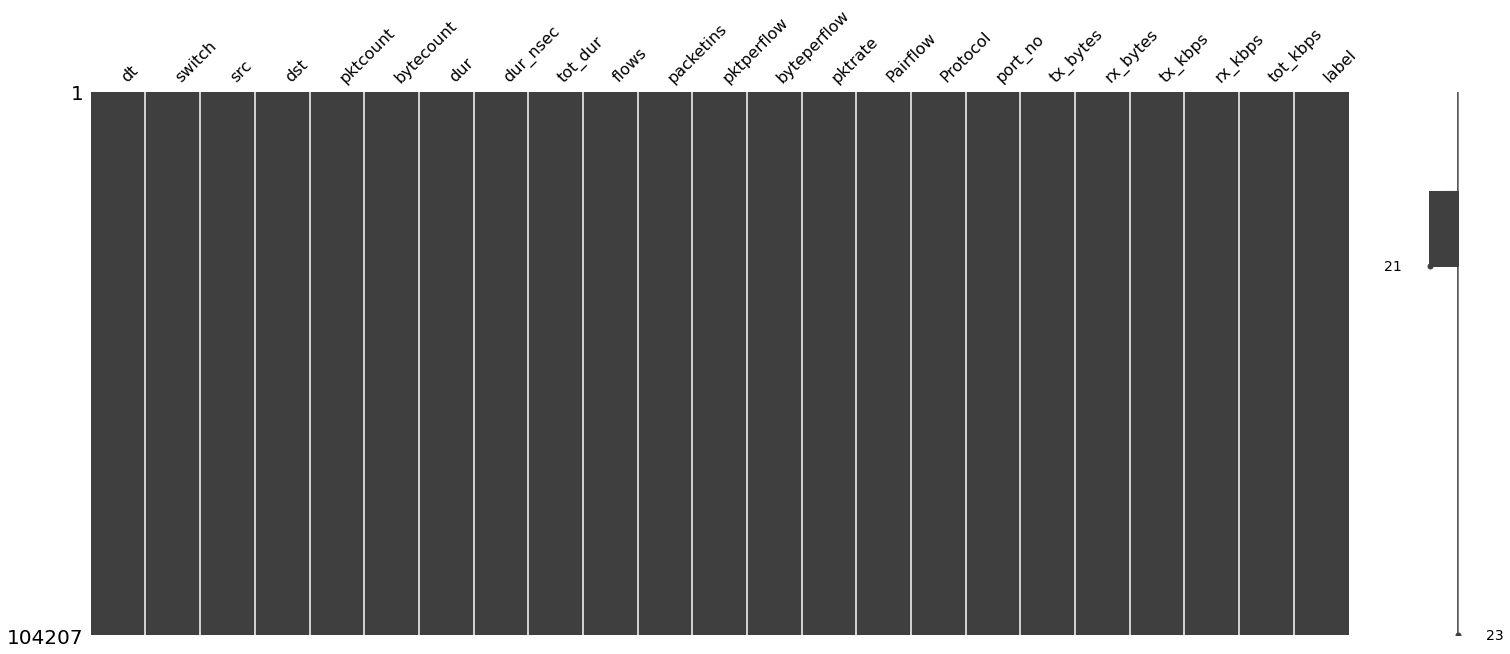

In [6]:
msno.matrix(d_info)

### Drop rows with null/missing values

In [7]:
d_info.dropna(inplace=True)

### Information after removing Null Values

In [8]:
print(d_info.isnull().sum())
print("This Dataset has {} rows and {} columns after removing null values".format(d_info.shape[0], d_info.shape[1]))

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64
This Dataset has 103701 rows and 23 columns after removing null values


### Distribution of Target Class

In [9]:
bad_case = d_info[d_info['label'] == 1]
safe_case = d_info[d_info['label'] == 0]

print('Number of DDOS attacks that has occured :',round((len(bad_case)/d_info.shape[0])*100,2),'%')
print('Number of DDOS attacks that has not occured :',round((len(safe_case)/d_info.shape[0])*100,2),'%')

Number of DDOS attacks that has occured : 39.03 %
Number of DDOS attacks that has not occured : 60.97 %


#### Barplot of Target Class

Text(0, 0.5, 'Frequency percentage %')

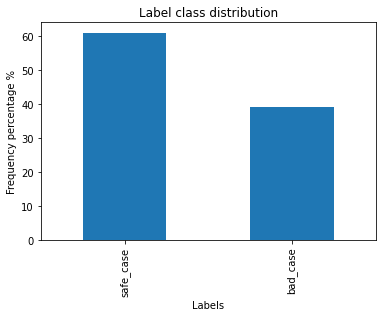

In [10]:
# Let's plot the Label class against the Frequency
labels = ['safe_case','bad_case']
classes = pd.value_counts(d_info['label'], sort = True) / d_info['label'].count() *100
classes.plot(kind = 'bar')
plt.title("Label class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Labels")
plt.ylabel("Frequency percentage %")

#### Pairplot of select features

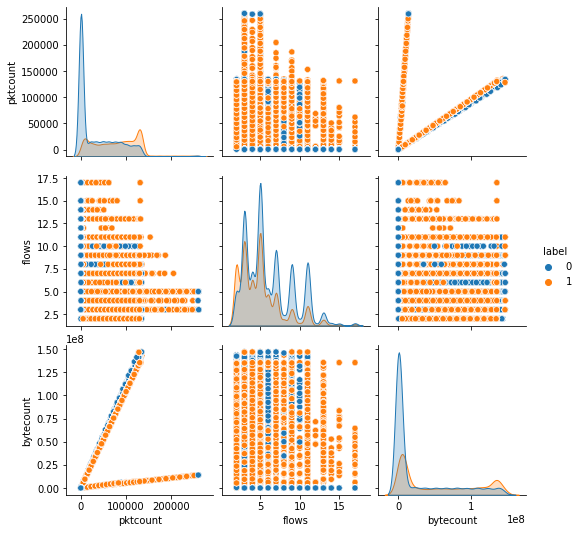

In [11]:
sns.pairplot(d_info,hue="label",vars=['pktcount','flows','bytecount'])

#### Columns in the dataset

In [12]:
d_info.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

#### Unique values in each column

In [13]:
print(d_info.apply(lambda col: col.unique()))

dt             [11605, 11425, 9906, 11575, 11305, 11485, 1145...
switch                           [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
src            [10.0.0.1, 10.0.0.2, 10.0.0.4, 10.0.0.10, 10.0...
dst            [10.0.0.8, 10.0.0.7, 10.0.0.3, 10.0.0.5, 10.0....
pktcount       [126395, 90333, 32914, 112864, 36282, 117399, ...
bytecount      [134737070, 96294978, 35086324, 120313024, 386...
dur            [280, 200, 73, 250, 80, 260, 230, 160, 13, 10,...
dur_nsec       [734000000, 744000000, 246000000, 732000000, 7...
tot_dur        [281000000000.0, 201000000000.0, 73246000000.0...
flows          [2, 3, 4, 5, 6, 7, 8, 11, 9, 10, 13, 15, 17, 1...
packetins      [1943, 1931, 1306, 1910, 1790, 2242, 2175, 110...
pktperflow     [13531, 13534, 13385, 13537, 13536, 13533, 0, ...
byteperflow    [14424046, 14427244, 14268410, 14430442, 14429...
pktrate        [451, 446, 0, 443, 288, 450, 448, 449, 455, 14...
Pairflow                                                  [0, 1]
Protocol                 

#### Numerical Features

In [14]:
numerical_features = [feature for feature in d_info.columns if d_info[feature].dtypes != 'O']
print("The number of numerical features is",len(numerical_features),"and they are : \n",numerical_features)

The number of numerical features is 20 and they are : 
 ['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label']


#### Categorical Features

In [15]:
categorical_features = [feature for feature in d_info.columns if d_info[feature].dtypes == 'O']
print("The number of categorical features is",len(categorical_features),"and they are : \n",categorical_features)

The number of categorical features is 3 and they are : 
 ['src', 'dst', 'Protocol']


#### Number of Unique values in the numerical features 

In [16]:
# number of unique values in each numerical variable
d_info[numerical_features].nunique(axis=0)

dt               858
switch            10
pktcount        9043
bytecount       9269
dur              840
dur_nsec        1000
tot_dur         4183
flows             15
packetins        168
pktperflow      2092
byteperflow     2793
pktrate          446
Pairflow           2
port_no            5
tx_bytes       12257
rx_bytes       11623
tx_kbps         1800
rx_kbps         1730
tot_kbps        2259
label              2
dtype: int64

#### Discrete numerical features

In [17]:
#discrete numerical features 
discrete_feature = [feature for feature in numerical_features if d_info[feature].nunique()<=15 and feature != 'label']
print("The number of discrete features is",len(discrete_feature),"and they are : \n",discrete_feature)

The number of discrete features is 4 and they are : 
 ['switch', 'flows', 'Pairflow', 'port_no']


In [18]:
d_info[discrete_feature].head(10)

,switch,flows,Pairflow,port_no
0,1,2,0,4
1,1,2,0,2
2,1,2,0,1
3,1,2,0,1
4,1,3,0,2
5,1,2,0,2
6,1,2,0,1
7,1,2,0,3
8,1,2,0,2
9,1,2,0,4


#### Continuous features

In [19]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + ['label']]
print("The number of continuous_feature features is",len(continuous_feature),"and they are : \n",continuous_feature)

The number of continuous_feature features is 15 and they are : 
 ['dt', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps']


### Exploratory Data Analysis

#### Plotting function definition 

In [20]:
def countplot_distribution(col):
    sns.set_theme(style="darkgrid")
    sns.countplot(y=col, data=d_info).set(title = 'Distribution of ' + col)

def histplot_distribution(col):
    sns.set_theme(style="darkgrid")
    sns.histplot(data=d_info,x=col, kde=True,color="red").set(title = 'Distribution of ' + col)

#### Visualize the distribution of Categorical features

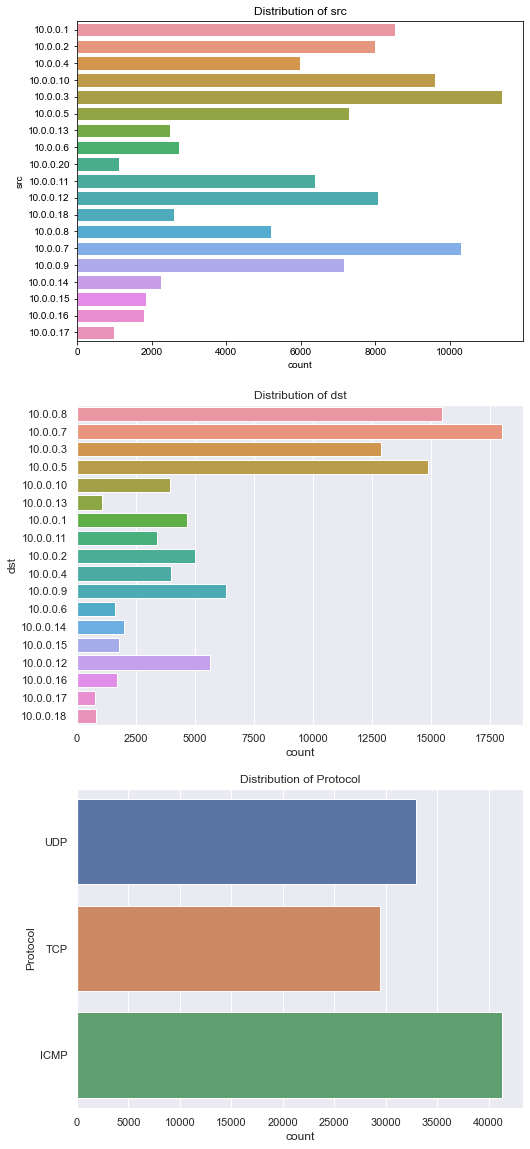

In [21]:
## Lets analyse the categorical values by creating histograms to understand the distribution
f = plt.figure(figsize=(8,20))
for i in range(len(categorical_features)):
    f.add_subplot(len(categorical_features), 1, i+1)
    countplot_distribution(categorical_features[i])
plt.show()

#### Visualize the quartiles of categorical features wrt total duration

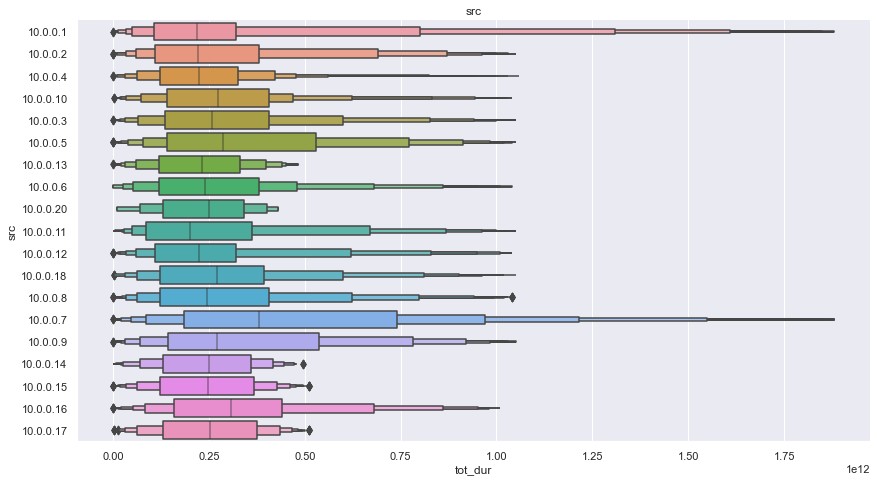

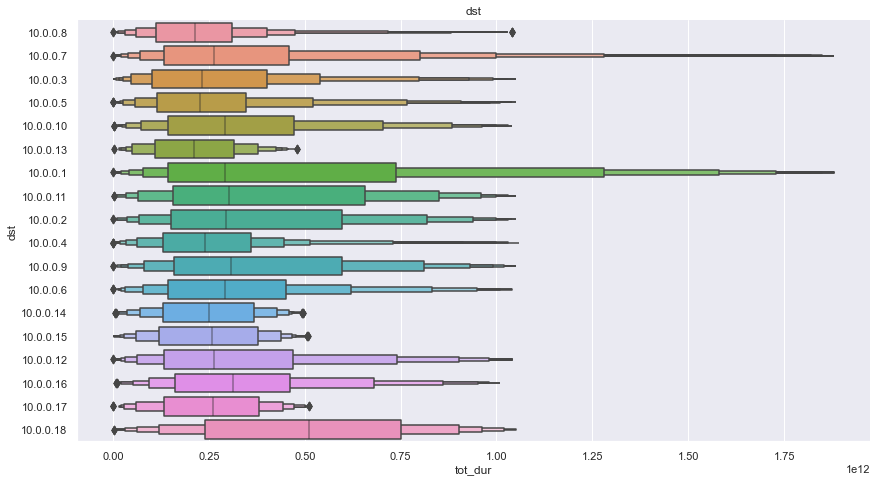

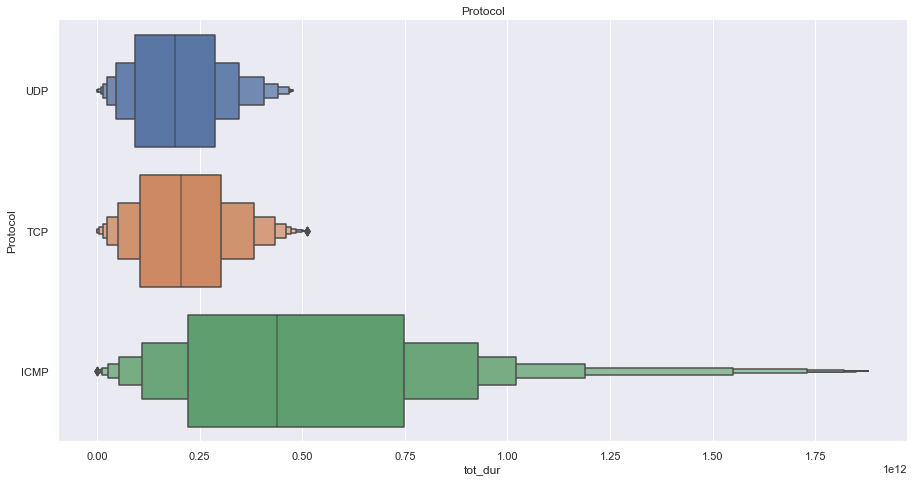

In [22]:
for i in range(len(categorical_features)):
    g = sns.catplot(data=d_info,x="tot_dur",y=categorical_features[i],kind="boxen").set(title = categorical_features[i])
    g.fig.set_figheight(7)
    g.fig.set_figwidth(15)

#### Visualize the distribution of continuous features

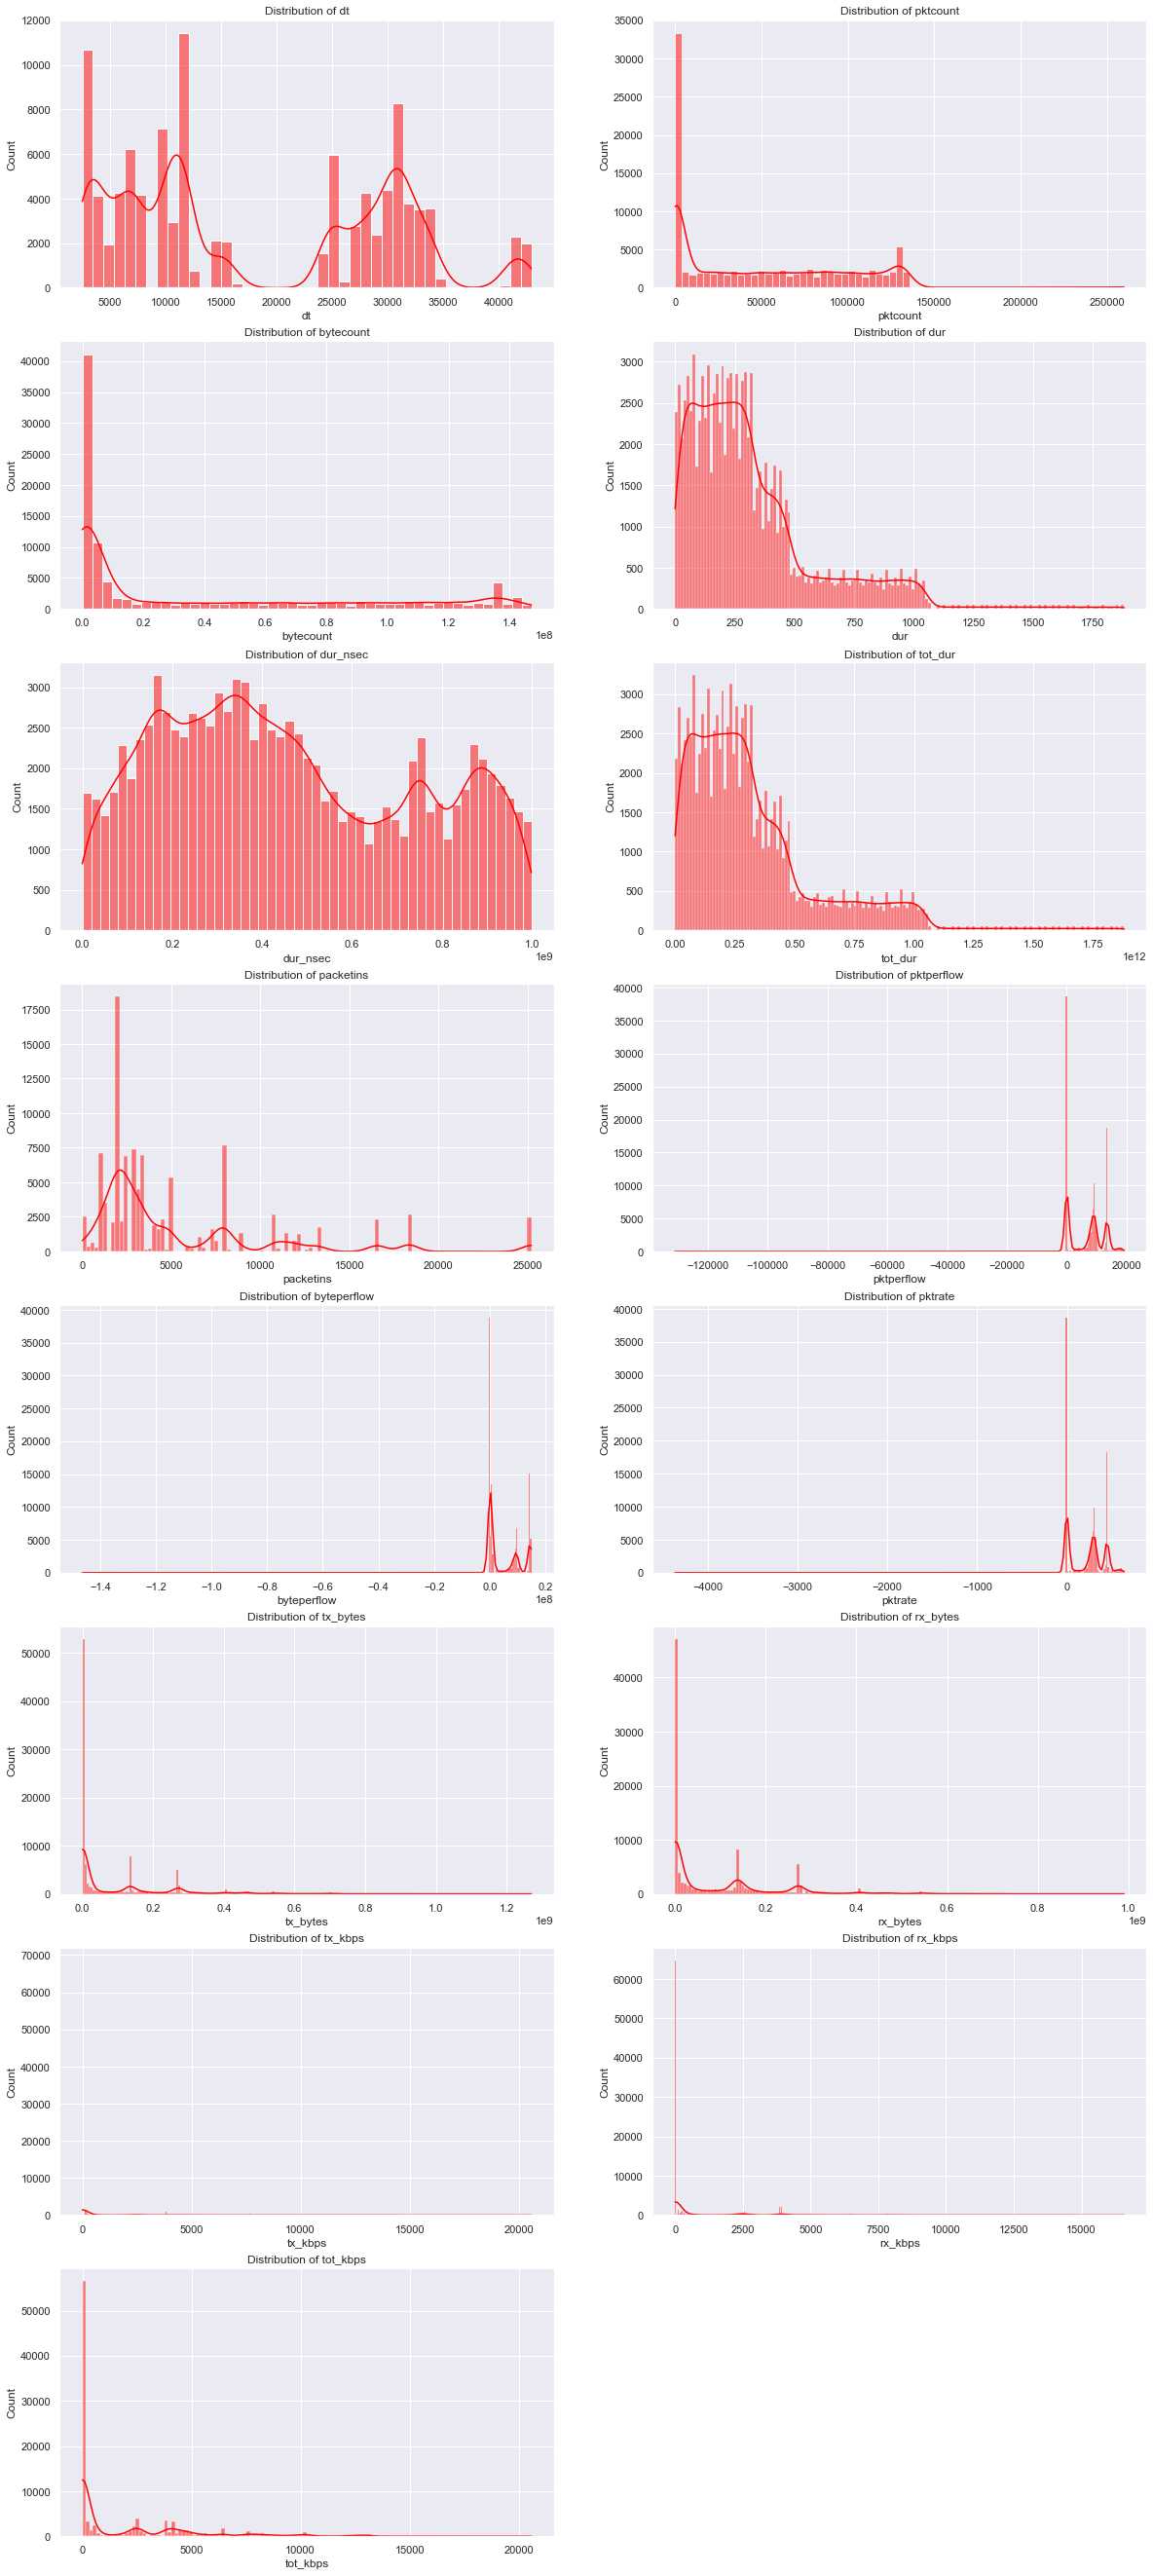

In [23]:
## Lets analyse the continuous values by creating histograms to understand the distribution
f = plt.figure(figsize=(20,90))
for i in range(len(continuous_feature)):
    f.add_subplot(len(continuous_feature), 2, i+1)
    histplot_distribution(continuous_feature[i])
plt.show()

#### Visualize the distribution of continuous features wrt packet count, protocol and type of attack

<Figure size 1440x1440 with 0 Axes>

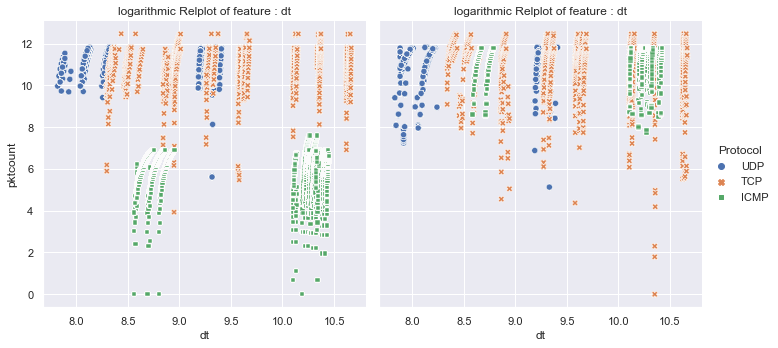

<Figure size 1440x1440 with 0 Axes>

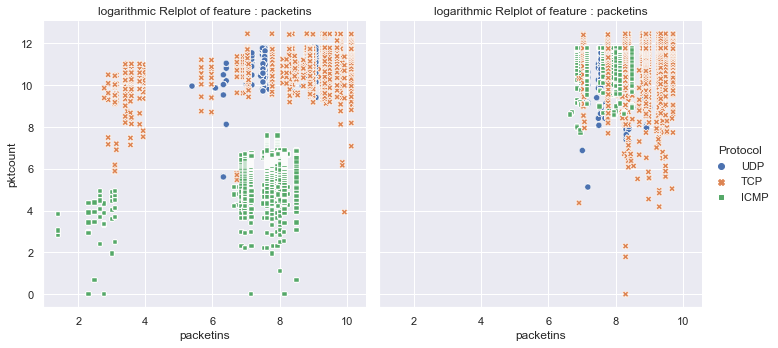

<Figure size 1440x1440 with 0 Axes>

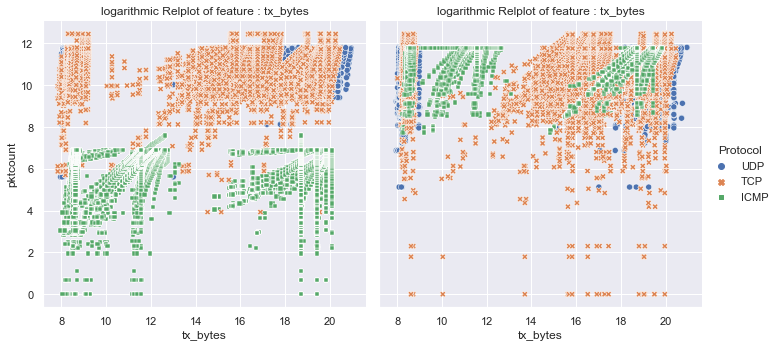

<Figure size 1440x1440 with 0 Axes>

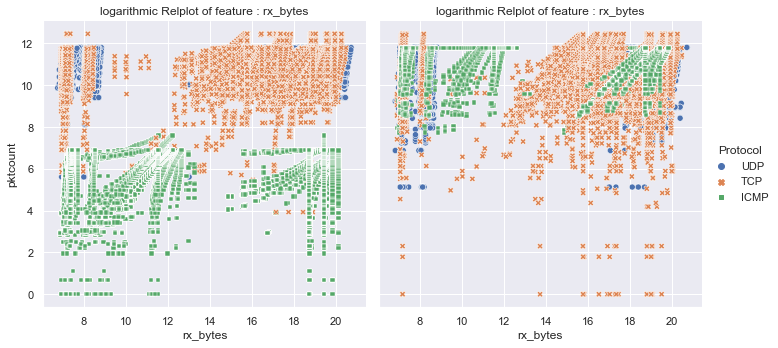

In [24]:
## Relplot of log(variable)
import warnings
warnings.filterwarnings("ignore")
for feature in continuous_feature:
    data=d_info.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['pktcount']=np.log(data['pktcount'])
        plt.figure(figsize=(20,20))
        sns.relplot(data=data, x=data[feature],y=data['pktcount'],hue="Protocol",style="Protocol",
                    col="label",kind="scatter").set(title="logarithmic Relplot of feature : " + feature)

#### Visualize the distribution of numerical discrete features

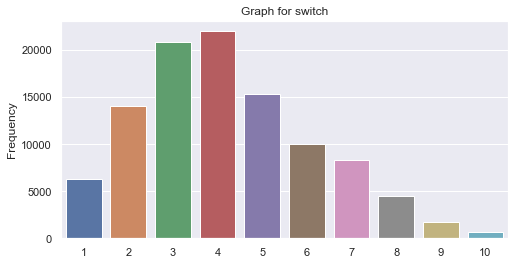

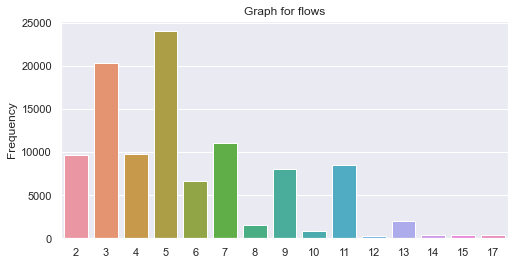

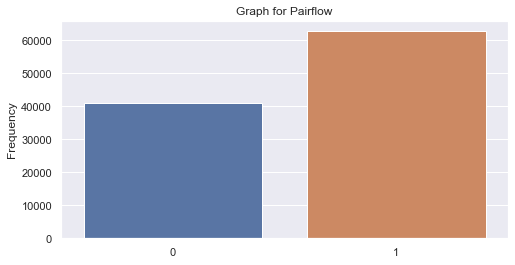

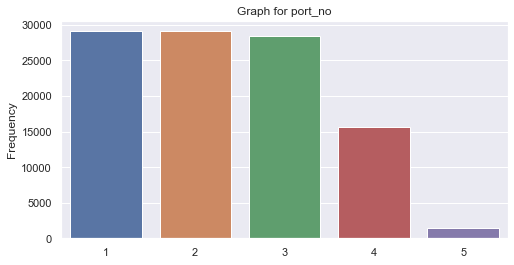

In [25]:
for feature in discrete_feature:
    plt.figure(figsize=(8,4))
    cat_num = d_info[feature].value_counts()
    sns.barplot(x=cat_num.index, y = cat_num).set(title = "Graph for "+feature, ylabel="Frequency")
    plt.show()

In [26]:
def get_percentage_bad_case_protocols():
    arr = [x for x, y in zip(d_info['Protocol'], d_info['label']) if y == 1]
    perc_arr = []
    for i in ['UDP','TCP','ICMP']:
        perc_arr.append(arr.count(i)/len(arr) *100)
    return perc_arr

#### Distribution of protocols for bad_case attacks

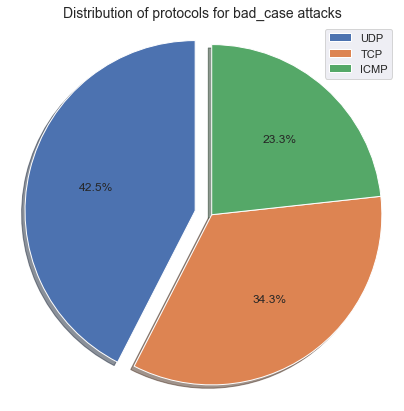

In [27]:
fig1, ax1 = plt.subplots(figsize=[7,7])
ax1.pie(get_percentage_bad_case_protocols(), explode=(0.1, 0, 0), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend(['UDP', 'TCP', 'ICMP'],loc="best")
plt.title('Distribution of protocols for bad_case attacks',fontsize = 14)
plt.show()

#### Checking for outliers in Packet count feature

Text(0.5, 1.0, 'Boxplot, Packet count for different protocols')

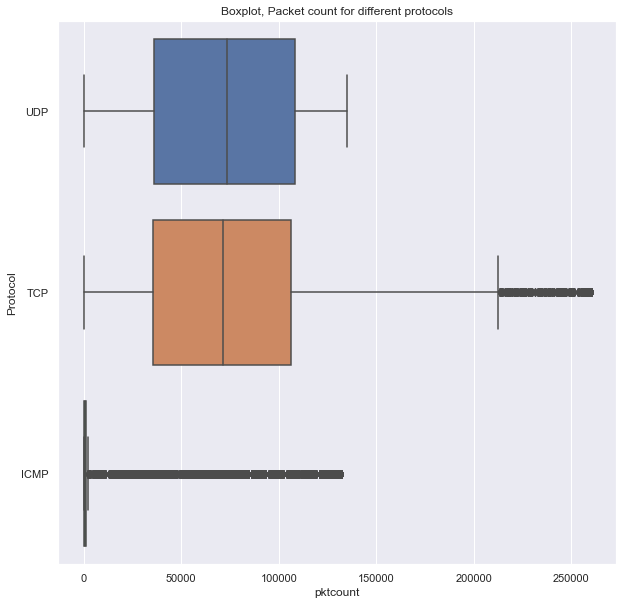

In [28]:
fig, ax = plt.subplots(figsize=[10, 10])
sns.boxplot(
    data=d_info,
    x='pktcount',
    y='Protocol'
)
ax.set_title('Boxplot, Packet count for different protocols')

#### Heat map of correlation of features

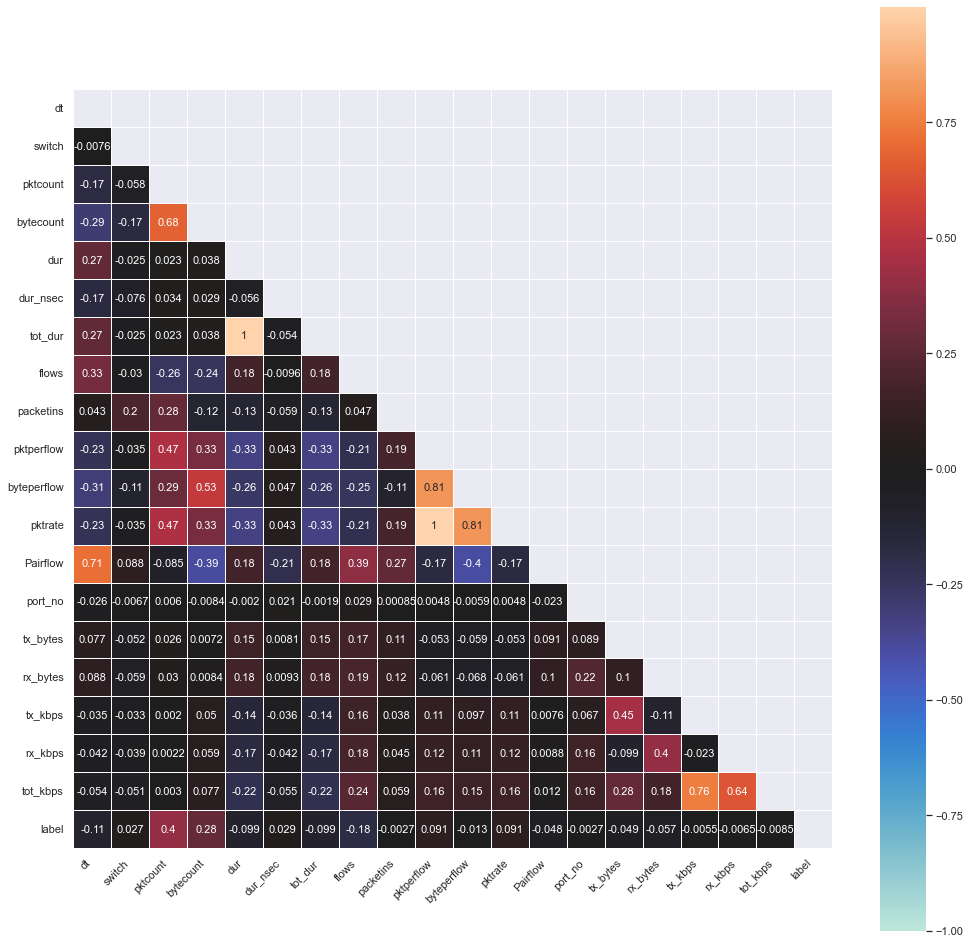

In [29]:
correlation_matrix = d_info.corr()
fig = plt.figure(figsize=(17,17))
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
sns.set_theme(style="darkgrid")
ax = sns.heatmap(correlation_matrix,square = True,annot=True,center=0,vmin=-1,linewidths = .5,annot_kws = {"size": 11},mask = mask)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right');
plt.show()

In [30]:
print("Features which need to be encoded are : \n" ,categorical_features)

Features which need to be encoded are : 
 ['src', 'dst', 'Protocol']


### Encoding categorical features

In [31]:
d_info = pd.get_dummies(d_info, columns=categorical_features,drop_first=True)
print("This Dataframe has {} rows and {} columns after encoding".format(d_info.shape[0], d_info.shape[1]))

This Dataframe has 103701 rows and 57 columns after encoding


In [32]:
#dataframe after encoding
d_info.head(10)

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,dst_10.0.0.2,dst_10.0.0.3,dst_10.0.0.4,dst_10.0.0.5,dst_10.0.0.6,dst_10.0.0.7,dst_10.0.0.8,dst_10.0.0.9,Protocol_TCP,Protocol_UDP
0,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,0,0,0,0,0,0,1,0,0,1
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,0,0,0,0,0,0,1,0,0,1
2,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,0,0,0,0,0,0,1,0,0,1
3,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,0,0,0,0,0,0,1,0,0,1
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,0,0,0,0,0,0,1,0,0,1
5,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,0,0,0,0,0,0,1,0,0,1
6,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,0,0,0,0,0,0,1,0,0,1
7,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,0,0,0,0,0,0,1,0,0,1
8,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,0,0,0,0,0,0,1,0,0,1
9,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,0,0,0,0,0,0,1,0,0,1


In [33]:
d_info.dtypes

dt                 int64
switch             int64
pktcount           int64
bytecount          int64
dur                int64
dur_nsec           int64
tot_dur          float64
flows              int64
packetins          int64
pktperflow         int64
byteperflow        int64
pktrate            int64
Pairflow           int64
port_no            int64
tx_bytes           int64
rx_bytes           int64
tx_kbps            int64
rx_kbps          float64
tot_kbps         float64
label              int64
src_10.0.0.10      uint8
src_10.0.0.11      uint8
src_10.0.0.12      uint8
src_10.0.0.13      uint8
src_10.0.0.14      uint8
src_10.0.0.15      uint8
src_10.0.0.16      uint8
src_10.0.0.17      uint8
src_10.0.0.18      uint8
src_10.0.0.2       uint8
src_10.0.0.20      uint8
src_10.0.0.3       uint8
src_10.0.0.4       uint8
src_10.0.0.5       uint8
src_10.0.0.6       uint8
src_10.0.0.7       uint8
src_10.0.0.8       uint8
src_10.0.0.9       uint8
dst_10.0.0.10      uint8
dst_10.0.0.11      uint8


### Split into Independent and dependent variables

In [34]:
#separating input and output attributes
x = d_info.drop(['label'], axis=1)
y = d_info['label']

### Normalizing features

In [35]:
ms = MinMaxScaler()
x = ms.fit_transform(x)

### Train-Test-Split [75-25]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3)
print(X_train.shape, X_test.shape)

(72590, 56) (31111, 56)


## BASELINE CLASSIFIERS
1. DNN
2. KNN
3. SVM
4. Decision tree
5. Naive Bayes
6. Quadratic Discriminant Analaysis
7. SGD
8. Logistic Regression
9. XGBoost

#### Deep Neural Network

In [37]:
Classifier_accuracy = []

## Defining the Deep Neural Network

In [38]:
# Define and compile model
model = keras.Sequential()
model.add(Dense(28 , input_shape=(56,) , activation="relu" , name="Hidden_Layer_1"))
model.add(Dense(10 , activation="relu" , name="Hidden_Layer_2"))
model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile( optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 28)                1596      
                                                                 
 Hidden_Layer_2 (Dense)      (None, 10)                290       
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


## Model fitting 

In [39]:
# fit model
history_org = model.fit(
    X_train, 
    y_train, 
    batch_size=32, 
    epochs=100, verbose=2, 
    callbacks=None, 
    validation_data=(X_test,y_test), 
    shuffle=True, 
    class_weight=None, 
    sample_weight=None, 
    initial_epoch=0)

Epoch 1/100
2269/2269 - 6s - loss: 0.1596 - accuracy: 0.9337 - val_loss: 0.0919 - val_accuracy: 0.9663 - 6s/epoch - 2ms/step
Epoch 2/100
2269/2269 - 4s - loss: 0.0903 - accuracy: 0.9646 - val_loss: 0.1005 - val_accuracy: 0.9603 - 4s/epoch - 2ms/step
Epoch 3/100
2269/2269 - 6s - loss: 0.0772 - accuracy: 0.9699 - val_loss: 0.0615 - val_accuracy: 0.9759 - 6s/epoch - 3ms/step
Epoch 4/100
2269/2269 - 6s - loss: 0.0658 - accuracy: 0.9738 - val_loss: 0.0672 - val_accuracy: 0.9725 - 6s/epoch - 3ms/step
Epoch 5/100
2269/2269 - 4s - loss: 0.0588 - accuracy: 0.9765 - val_loss: 0.0523 - val_accuracy: 0.9815 - 4s/epoch - 2ms/step
Epoch 6/100
2269/2269 - 4s - loss: 0.0537 - accuracy: 0.9787 - val_loss: 0.0476 - val_accuracy: 0.9818 - 4s/epoch - 2ms/step
Epoch 7/100
2269/2269 - 5s - loss: 0.0518 - accuracy: 0.9794 - val_loss: 0.0505 - val_accuracy: 0.9808 - 5s/epoch - 2ms/step
Epoch 8/100
2269/2269 - 4s - loss: 0.0479 - accuracy: 0.9812 - val_loss: 0.0440 - val_accuracy: 0.9826 - 4s/epoch - 2ms/step


## Plotting Loss v/s Epochs 

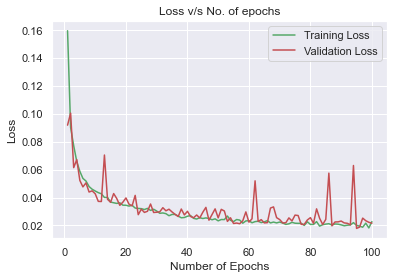

In [40]:
loss = history_org.history['loss']
val_loss = history_org.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss v/s No. of epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting Accuracy v/s Epochs 

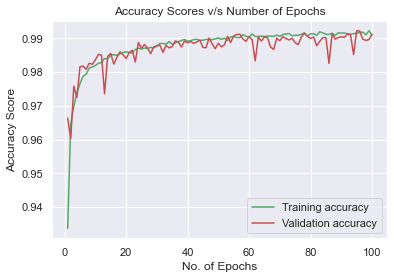

In [41]:
loss = history_org.history['accuracy']
val_loss = history_org.history['val_accuracy']
plt.plot(epochs, loss, 'g', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'r', label = 'Validation accuracy')
plt.title('Accuracy Scores v/s Number of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

## Model Evaluation 

In [42]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy of Deep neural Network : %.2f' % (accuracy*100))
Classifier_accuracy.append(accuracy*100)

973/973 [==============================] - 2s 2ms/step - loss: 0.0216 - accuracy: 0.9912
Accuracy of Deep neural Network : 99.12


#### K-Nearest Neighbor Classifier

In [43]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of KNN Classifier : %.2f" % (accuracy*100))

Accuracy of KNN Classifier : 96.54


#### SVM Classifier

In [ ]:
svc_clf = SVC() 
svc_clf.fit(X_train,y_train)
y_pred = svc_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of SVM Classifier : %.2f" % (accuracy*100) )

#### Decision Tree Classifier

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Decision Tree Classifier : %.2f" % (accuracy*100) )

#### Naive Bayes Classifier

In [ ]:
nb_clf = CategoricalNB()
nb_clf.fit(X_train,y_train)
y_pred = nb_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Naive Bayes Classifier : %.2f" % (accuracy*100) )

#### Quadratic Discriminant Analysis Classifier

In [ ]:
qda_clf=QuadraticDiscriminantAnalysis()
qda_clf.fit(X_train,y_train)
y_pred=qda_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of QDA Classifier : %.2f" % (accuracy*100))

#### Stochastic Gradient Classifier

In [ ]:
sgd_clf=SGDClassifier(loss="hinge", penalty="l2")
sgd_clf.fit(X_train,y_train)
y_pred=sgd_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of SGD Classifier : %.2f" % (accuracy*100))

#### Logistic Regression 

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
y_pred=lr_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Logistic Regression Classifier : %.2f" % (accuracy*100))

#### XGBoost Classifier

In [ ]:
xgb_clf=xgb.XGBClassifier(eval_metric = 'error',objective='binary:logistic',max_depth=2, learning_rate=0.1)
xgb_clf.fit(X_train,y_train)
y_pred=xgb_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of XGBoost Classifier : %.2f" % (accuracy*100))

### Comparitive analysis of models

In [ ]:
Classifier_names = ["DNN", "KNN", "RBF_SVM", "Decision Tree","Naive Bayes","Quadratic","SGD","Logistic Regression","XGBoost"]

In [ ]:
d_info_clf = pd.DataFrame()
d_info_clf['name'] = Classifier_names
d_info_clf['Accuracy'] = Classifier_accuracy
d_info_clf = d_info_clf.sort_values(by=['Accuracy'], ascending=False)
d_info_clf.head(10)

#### Visualize accuracies of the models

In [ ]:
sns.set(style="whitegrid",rc={'figure.figsize':(7,7)})
ax = sns.barplot(y="name", x="Accuracy", data=d_info_clf)

In [ ]:
print(f"The best baseline Classifier is {d_info_clf.name[0]} with an accuracy of {d_info_clf.Accuracy[0]}.")

## Hyperparameter tuning 

In [ ]:
def model_builder(hp):
    model = keras.Sequential()
    
    model.add(Dense(28 , input_shape=(56,) , activation="relu" , name="Hidden_Layer_1"))
    model.add(Dense(10 , activation="relu" , name="Hidden_Layer_2"))
    model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',[1e-2, 1e-3, 1e-4])), loss='binary_crossentropy', metrics=['accuracy'])
    
    return history, model.layers, model

In [ ]:
from keras_tuner.tuners import RandomSearch
tuner = RandomSearch(model_builder, objective='val_accuracy', max_trials=3, executions_per_trial=2, directory='ddos', project_name='ddos_isa', overwrite=True)

In [ ]:
tuner.search_space_summary()

In [ ]:
tuner.search(X_train, y_train, epochs=100, validation_data=(X_test,y_test), batch_size = 32)

In [ ]:
tuner.results_summary()

## Best Hyperparameters 

In [ ]:
modified_model = tuner.get_best_models(num_models=1)[0]
modified_hparam=tuner.get_best_hyperparameters(num_trials=1)[0]
tuner.get_best_hyperparameters()[0].values

## Model Evaluation

In [ ]:
loss, accuracy = modified_model.evaluate(X_test, y_test)

## Get Best value for epoch 

In [ ]:
model = tuner.hypermodel.build(modified_hparam)
history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_test,y_test))
val_per_epoch = history.history['val_accuracy']
modified_epoch = val_per_epoch.index(max(val_per_epoch)) + 1
print('Best epoch value: %d' % (modified_epoch,))

## Plot of Loss v/s Epochs for hypermodel

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss v/s No. of epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plot for Accuracy v/s Epochs for hypermodel

In [ ]:
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
plt.plot(epochs, loss, 'g', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'r', label = 'Validation accuracy')
plt.title('Accuracy Scores v/s Number of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

## Final Model 

In [ ]:
hypermodel = tuner.hypermodel.build(modified_hparam)

## Fitting the hypermodel 

In [ ]:
hypermodel.fit(X_train, y_train, batch_size=32, epochs=modified_epoch, validation_data=(X_test, y_test), initial_epoch=0)

In [ ]:
hypermodel.summary()

## Printing the final accuracy and loss values of the hypermodel 

In [ ]:
result_final = hypermodel.evaluate(X_test, y_test, batch_size=32)
print("[Loss, Accuracy]:", result_final)

## Making Sample Predictions 

In [ ]:
classes = model.predict(X_test)
print(classes)

In [ ]:
y_pred = []
for i in classes:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:20]

In [ ]:
y_test[:20]

## Classification Report 

In [ ]:
print(classification_report(y_test, y_pred, target_names = labels))

## Plotting Confusion Matrix

In [ ]:
from itertools import product
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    cm1 = cm
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] 
        thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, str(cm1[i, j])+ " ("+ str(cm[i, j]*100)+"%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
confusion_mtx = confusion_matrix(y_test, y_pred) 
plot_confusion_matrix(confusion_mtx, classes = labels)

## Displaying ROC-AUC curve

In [ ]:
def model_builder_crv(X_train, X_test, y_train, y_test):
    model = keras.Sequential()
    
    model.add(Dense(28 , input_shape=(56,) , activation="relu" , name="Hidden_Layer_1"))
    model.add(Dense(10 , activation="relu" , name="Hidden_Layer_2"))
    model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])
    history = model.fit(X_train,y_train,epochs=100,verbose=0,callbacks=None,validation_data=(X_test,y_test))

    return history, model.layers, model

In [ ]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(20,20))
history,model_layers,model = model_builder_crv(X_train, X_test, y_train, y_test)    
y_predicted = model(X_test)
fpr, tpr, keras_thr = roc_curve(y_test, y_predicted)
auc_crv = auc(fpr, tpr)
print(f"Area under the curve(AUC) is: {auc_crv}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.show()